# Logistic regression

## 1. Introduction

In this lecture, you'll be introduced to the logistic regression model. We'll start with an introductory example using linear regression, which you've seen before, to act as a segue into logistic regression. After that, we'll go into more formal notation of logistic regression models. We'll conclude this lecture by looking at a real data example.

## 2. Recap of the linear regression model

You have previously learned about linear regression models. In these models, what you try to do is fit a linear relationshio between two variables. An example is given below. In this example, we want to find a relationship between age and monthly income. It is definitely reasonable to assume that, on average, older people have a higher income than younger people who are newer to the job market and have less experience. A potential relationship could look like the plot below. The monthly income is shown in 1000 USD.

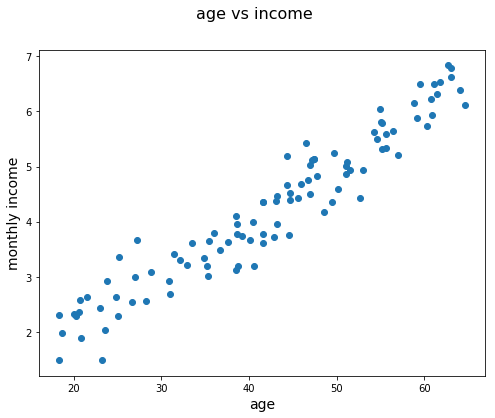

In [630]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

age = np.random.uniform(18, 65, 100)
income = np.random.normal((age/10), 0.4)

fig = plt.figure(figsize=(8,6))
fig.suptitle('age vs income', fontsize=16)
plt.scatter(age, income)
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.show()

In linear regression, we'd try to find a relationship between age and monthly income. Conceptually, we'd try to fit a line that represents the relationship between age and monthly income, as shown below.

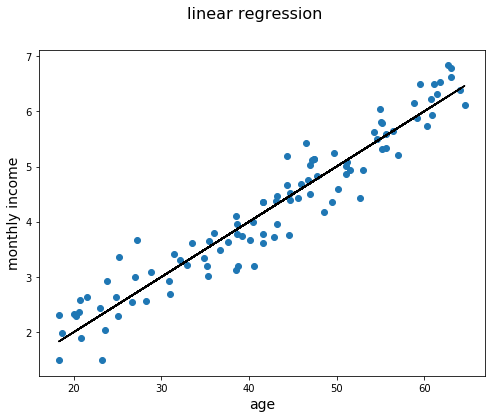

In [631]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('linear regression', fontsize=16)
plt.scatter(age, income)
plt.plot(age, age/10, c = "black")
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.show()

 The idea is that we could use this line to make predictions in the future. In this case, we modeled the general relationship as follows: the extected monthly income for someone who is, say, 40 years old, is 3000 (3 on the y-axis). Of course, the actual income will most likely be different, but this gives us an indication of what we could expect.

## 3. So how is this related to logistic regression?

Now, imagine you get a data set where no information on exact salaries is given (after all, people don't like to talk about how much they earn!), but you only have information on whether or not thet earn more than 4000 USD per month. Starting from the generated data we used before, the new variable `income_bin` was transformed to 1 when someone's income is over 4000 USD, and 0 when the income is less than 4000 USD.

In [640]:
income_bin = income > 4
income_bin =income_bin.astype(int)  
print(income_bin)

[0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0
 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1]


Let's have a look at what happens when we plot this.

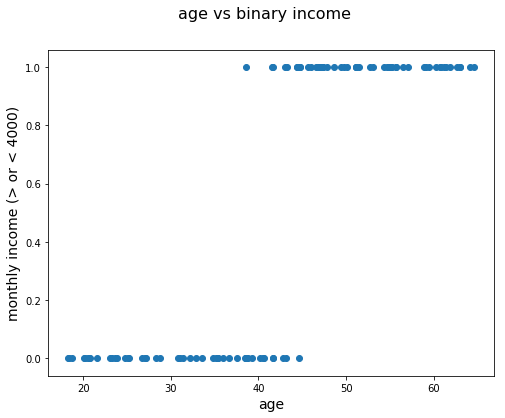

In [641]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('age vs binary income', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income (> or < 4000)", fontsize=14)
plt.show()

You can already tell that fitting a straight line will not be exactly desired here, but let's still have a look at what happens when we formallty build a regression line to these data. 

In [634]:
# create linear regression object
lin_reg = linear_model.LinearRegression()
lin_reg.fit(age.reshape(-1, 1), income_bin)
# store the coefficients
coef = lin_reg.coef_
interc = lin_reg.intercept_
# create the line
lin_income = (interc + age * coef)

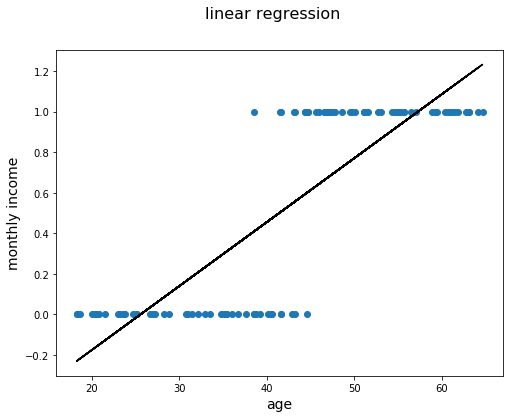

In [635]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('linear regression', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.plot(age, lin_income, c = "black")
plt.show()

You can see that this doesn't make a lot of sense. This straight line cannot grasp the true structure of what is going on in the linear regression model. 

In [636]:
# Create linear regression object
regr = linear_model.LogisticRegression(C=1e5)
# Train the model using the training sets
regr.fit(age.reshape(-1, 1), income_bin)

np.round(regr.predict_proba(age.reshape(-1, 1))[:,1], 3)

array([0.   , 0.972, 0.068, 1.   , 1.   , 0.   , 0.   , 1.   , 1.   ,
       1.   , 0.005, 0.375, 0.996, 0.999, 0.008, 0.817, 0.391, 0.   ,
       1.   , 1.   , 0.006, 0.965, 0.   , 0.007, 1.   , 0.989, 0.018,
       1.   , 0.001, 0.849, 1.   , 0.064, 1.   , 0.   , 0.998, 0.998,
       0.   , 1.   , 0.078, 1.   , 0.   , 0.   , 0.   , 0.995, 0.932,
       0.638, 0.   , 0.818, 0.002, 0.39 , 0.   , 0.954, 0.84 , 0.   ,
       0.967, 1.   , 1.   , 1.   , 1.   , 1.   , 0.   , 0.974, 0.218,
       0.   , 0.011, 0.   , 0.104, 1.   , 0.   , 0.   , 0.999, 0.914,
       0.184, 0.   , 0.   , 1.   , 0.035, 0.657, 0.   , 0.001, 0.066,
       0.961, 1.   , 0.975, 0.998, 0.   , 1.   , 1.   , 0.98 , 0.069,
       0.   , 0.85 , 0.598, 1.   , 0.231, 0.387, 0.665, 1.   , 0.   ,
       0.994])

In [638]:
# store the coefficients
coef = regr.coef_
interc = regr.intercept_
# create the linear predictor
lin_pred= (age * coef + interc)
# perform the log transformation
mod_income = 1 / (1 + np.exp(-lin_pred))

#sort the numbers to make sure plot looks right
age_ordered, mod_income_ordered = zip(*sorted(zip(age ,mod_income.ravel()),key=lambda x: x[0]))

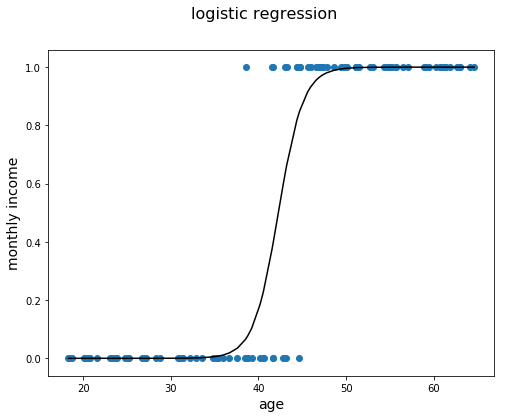

In [642]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('logistic regression', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel("age", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.plot(age_ordered, mod_income_ordered, c = "black")
plt.show()

## 4. Formal notation of logistic regression

# A real data example

In [643]:
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [26]:
salaries = pd.read_csv("salaries_final.csv", index_col = 0)

In [61]:
from patsy import dmatrices
y, X = dmatrices('Target ~ Age  + C(Race) + C(Sex)',
                  salaries, return_type = "dataframe")

In [62]:
import statsmodels.api as sm
logit_model = sm.Logit(y.iloc[:,1], X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.498651
         Iterations 6


In [63]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Target[>50K]   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32554
Method:                           MLE   Df Model:                            6
Date:                Tue, 15 May 2018   Pseudo R-squ.:                 0.09666
Time:                        18:58:31   Log-Likelihood:                -16237.
converged:                       True   LL-Null:                       -17974.
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.4248      0.189    -23.380      0.000      -4.796      -4.054
C(Race)[T.Asian-Pac-Islander]     0.9991      0.197      5.079      0.000       0.614       1.385
C(Race)[T.Black]                  0.1812      0.191      0.950      0.342      -0.193       0.555
C(Race)[T.Other]                 -0.1143      0.282     -0.406      0.685      -0.667       0.438
C(Race)[T.White]                  0.8742      0.183      4.782      0.000       0.516       1.232
C(Sex)[T.Male]                    1.2069      0.035     34.380      0.000       1.138       1.276
Age                               0.0387      0.001     38.530      0.000       0.037       0.041
=================================================================================================
"""

In [64]:
np.exp(result.params)

Intercept                        0.011977
C(Race)[T.Asian-Pac-Islander]    2.715861
C(Race)[T.Black]                 1.198638
C(Race)[T.Other]                 0.891987
C(Race)[T.White]                 2.396965
C(Sex)[T.Male]                   3.343142
Age                              1.039480
dtype: float64

In [46]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X, y.iloc[:,1])
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Part data

In [21]:
sal_bal1= salaries[salaries["Target"]== '<=50K'][0:7000]
sal_bal2= salaries[salaries["Target"]== '>50K'][0:7000]
sal_final = pd.concat([sal_bal1, sal_bal2])